In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('events.csv',low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
df['time'] = pd.to_datetime(df['timestamp'])

In [5]:
df['hour'] = df['time'].dt.hour

In [6]:
df_ads = df.loc[df['event']=='ad campaign hit']

In [7]:
df_conversions = df.loc[df['event']=='conversion']

In [8]:
df_ads.count()

timestamp                   82827
event                       82827
person                      82827
url                         82756
sku                             0
model                           0
condition                       0
storage                         0
color                           0
skus                            0
search_term                     0
staticpage                      0
campaign_source             82796
search_engine                   0
channel                         0
new_vs_returning                0
city                            0
region                          0
country                         0
device_type                     0
screen_resolution               0
operating_system_version        0
browser_version                 0
time                        82827
hour                        82827
dtype: int64

In [9]:
df_ads['compro'] = df_ads['person'].isin(df_conversions['person'])

/home/nicolas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_ads.groupby('person').apply(lambda x: True in x['compro'].unique()).value_counts()

False    20753
True       559
dtype: int64

# Porcentaje que compro de las personas que entraron por ads

El porecentaje de personas que compro de los que entraron por ads es del 2.69%

# Clicks en ads segun hora del dia

/home/nicolas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AxesSubplot(0.125,0.125;0.775x0.755)


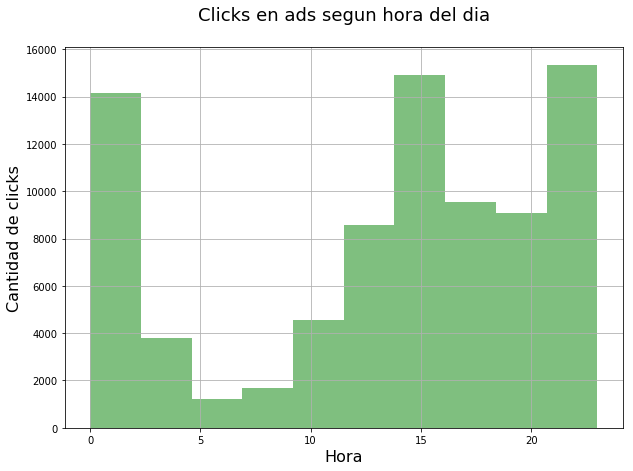

In [11]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7
plt.rcParams["figure.figsize"] = fig_size

df_ads['hour'] = df_ads['time'].dt.hour
g = df_ads['hour'].plot.hist(color='green',alpha=0.5)
g.set_title('Clicks en ads segun hora del dia\n',size=18)
g.set_xlabel('Hora',size=16)
g.set_ylabel('Cantidad de clicks',size=16)
g.grid()
print(g)